# Loading packages

In [158]:
#Comment out the other paths and comment in your path
#path = r'C:\Users\heuse\Desktop\SE_Risk_Management-1/' #Daniel Path
#path = '/Users/mandoholzknecht/SE_Risk_Management/' # Path Mando
path = 'C:/Users/Fabio/OneDrive/Dokumente/Uni Innsbruck/WS20/Applied risk mgmt/SE/Heusli/SE_Risk_Management/' # Path Fabio

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.anova as anova
import scipy as sci

from sklearn import metrics

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import datetime


# Loading the data

Loading the Training dataset + Test dataset

In [159]:
# use the realtive path finding
df_train = pd.read_csv(path + 'Training_Dataset.csv', sep=';', index_col=None)
df_test = pd.read_csv(path + 'Test_Dataset.csv', sep=';', index_col=0)

df_train.head(10)

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,bonds_payables_lt,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing
0,C_405,0,GmbH & Co. KG,12359,46730,1900,NaN,GKV,1.068738e+08,1.068738e+08,...,NaN,3.224471e+07,3.783199e+07,1.711147e+07,10297047.50,NaN,NaN,6.986094e+06,-1.112342e+06,-7520392.09
1,C_292,0,GmbH & Co. KG,10719,70101,1976,NaN,GKV,1.393869e+06,1.407889e+06,...,NaN,4.508026e+06,4.669179e+06,9.278377e+05,926383.75,NaN,NaN,-4.343980e+06,1.174427e+06,1128108.08
2,C_746,0,GmbH,13353,87100,1962,323.0,GKV,3.864034e+06,7.597353e+05,...,NaN,5.164048e+04,2.810119e+07,1.111696e+07,9146283.79,617816.28,NaN,9.548544e+06,-7.536444e+06,-22026.07
3,C_838,0,AG,12529,68320,1972,1.0,GKV,4.384786e+06,4.405058e+06,...,NaN,1.182011e+07,8.238474e+06,7.519183e+06,6890565.23,319848.26,NaN,1.715799e+06,-6.561222e+05,-169655.66
4,C_495,0,Einzelfirma,12165,47730,1908,NaN,GKV,1.104478e+08,1.104478e+08,...,NaN,4.547445e+08,3.546565e+07,8.545184e+06,5036615.09,516646.73,NaN,1.301809e+08,-1.419776e+08,12567030.80
5,C_494,0,GmbH,13055,68201,1990,415.0,GKV,4.518042e+04,4.518042e+04,...,NaN,7.953387e+04,8.484770e+04,8.061511e+04,75679.79,NaN,NaN,1.800497e+04,-3.787100e+02,0.00
6,C_300,0,GmbH,10969,68200,1991,2.0,GKV,1.508435e+08,1.479894e+08,...,NaN,6.657375e+08,8.479909e+07,3.142807e+07,11542490.91,326731.07,8000.0,4.007555e+07,-8.337054e+06,-34594274.52
7,C_453,0,GmbH,16792,78100,1991,NaN,GKV,2.843420e+08,2.843420e+08,...,NaN,2.883814e+09,4.229090e+08,4.312550e+08,21696000.00,448000.00,NaN,5.861770e+08,-7.339750e+08,-95826000.00
8,C_924,0,GmbH,13125,86101,1991,283.0,GKV,9.811591e+06,9.681040e+06,...,NaN,2.032968e+07,7.366730e+06,5.421665e+06,322573.88,372298.68,NaN,4.369386e+05,-1.879056e+06,-13729379.17
9,C_976,0,GmbH,12681,71122,1999,NaN,GKV,1.384595e+05,1.384595e+05,...,NaN,1.552805e+06,4.966969e+05,4.500943e+04,35726.57,NaN,NaN,1.947540e+05,3.318306e+05,-798859.83


# Understanding your data


## Univartiate descriptive anaylsis

The datatype of the variables is important as in dermines how you have to look at the data

In [160]:
catvar = [i for i in list(df_train.columns) if df_train[i].dtype=='O']
catvar # categorial variables

['id', 'legal_form', 'type_pl']

In [161]:
numvar = [i for i in list(df_train.columns) if df_train[i].dtype in ['float64','int64']]
numvar # numberical variables

['default',
 'zip_code',
 'sector',
 'year_inc',
 'count_emp',
 'sales',
 'gross_performance',
 'gross_profit',
 'earn_from_op',
 'fin_result',
 'oth_interest_inc',
 'oth_interest_exp',
 'result_from_ord_bus',
 'total_result',
 'annual_profit',
 'total_assets',
 'total_liabilities_st',
 'total_liabilities_mt',
 'total_liabilities_lt',
 'bank_liabilities_st',
 'bank_liabilities_mt',
 'bank_liabilities_lt',
 'trade_payables_st',
 'trade_payables_mt',
 'trade_payables_lt',
 'bonds_payables_st',
 'bonds_payables_mt',
 'bonds_payables_lt',
 'total_equity',
 'current_assets',
 'monetary_current_assets',
 'cash',
 'trade_receivables_st',
 'trade_receivables_lt',
 'cf_operating',
 'cf_investment',
 'cf_financing']

## Missing values

Overview of missing values in the data

In [162]:
df_train.isnull().sum().sort_values(ascending=False)

bonds_payables_st          669
bonds_payables_lt          669
trade_payables_lt          665
bonds_payables_mt          664
trade_payables_mt          648
trade_receivables_lt       645
bank_liabilities_lt        545
bank_liabilities_mt        483
trade_receivables_st       355
count_emp                  353
bank_liabilities_st        352
trade_payables_st          143
oth_interest_inc           127
oth_interest_exp            62
cash                        32
fin_result                  22
total_equity                21
gross_profit                 7
gross_performance            7
result_from_ord_bus          1
sales                        1
earn_from_op                 1
cf_financing                 1
annual_profit                1
total_assets                 1
cf_investment                1
current_assets               1
cf_operating                 1
sector                       0
zip_code                     0
legal_form                   0
default                      0
year_inc

In [163]:
df_test.isnull().sum().sort_values(ascending=False)

bonds_payables_lt          330
bonds_payables_st          330
trade_payables_lt          330
bonds_payables_mt          329
trade_payables_mt          322
trade_receivables_lt       320
bank_liabilities_lt        250
bank_liabilities_mt        230
count_emp                  179
bank_liabilities_st        172
trade_receivables_st       169
trade_payables_st           65
oth_interest_inc            62
oth_interest_exp            23
cash                        18
total_equity                 9
fin_result                   8
gross_performance            3
gross_profit                 3
cf_investment                1
cf_operating                 1
cf_financing                 1
earn_from_op                 0
year_inc                     0
sector                       0
type_pl                      0
sales                        0
zip_code                     0
total_liabilities_mt         0
result_from_ord_bus          0
total_result                 0
annual_profit                0
total_as

# Variables

Variable coding and transforming variables

In [164]:
# drop companies with to many null columns 
df_train = df_train.loc[df_train["id"] != 'C_620'] 

# get total liabilities
df_train['total_liabilities'] = df_train['total_liabilities_st'] + df_train['total_liabilities_mt'] + df_train['total_liabilities_lt']
df_test['total_liabilities'] = df_test['total_liabilities_st'] + df_test['total_liabilities_mt'] + df_test['total_liabilities_lt']

### Age columns
Transforming the year of incorporation variable to two age variables: one numerical (age_num) one and one categorical one (age_cat). 

\begin{equation*}
Age = Todays\ Year - Year\ Inc.
\end{equation*}

In [165]:
df_train['age_num'] = datetime.datetime.now().year - df_train["year_inc"]
df_train.sort_values(by="age_num",ascending=False).head(5)

#For the test data
df_test['age_num'] = datetime.datetime.now().year - df_test["year_inc"]

As we have some firms which are pretty old (some > 100 years) and two outliers (2020s) we can set their value to the e.g.: 95% quantile as this shouldn't change the meaning of the age variable that much. They are long on the market and it does not really matter if they are long on the market (e.g.: 100 years) or very very long in the business (eg: above 500 years). 

In [166]:
#take a look on the quantiles
quantiles = list()
for i in range(0,100,):
    quantiles.append(df_train["age_num"].quantile(i/100))

age_th = df_train["age_num"].quantile(0.99)

#replace outliers with 99% quantile
df_train.loc[df_train["age_num"] > age_th,"age_num"] = age_th

df_train.sort_values(by="age_num",ascending=False).head(10)

# For the test data
quantiles = list()
for i in range(0,100,):
    quantiles.append(df_test["age_num"].quantile(i/100))

age_th = df_test["age_num"].quantile(0.99)

#replace outliers with 99% quantile
df_test.loc[df_test["age_num"] > age_th,"age_num"] = age_th

In [167]:
df_train["age_quartile"] = pd.qcut(df_train["age_num"],10)
pd.crosstab(df_train["default"],df_train["age_quartile"])

age_quartile,"(9.999, 13.0]","(13.0, 16.0]","(16.0, 20.0]","(20.0, 23.0]","(23.0, 25.0]","(25.0, 29.0]","(29.0, 32.0]","(32.0, 42.6]","(42.6, 66.0]","(66.0, 158.33]"
default,,,,,,,,,,
0,69,61,75,78,36,67,63,54,65,62
1,5,1,3,6,4,0,7,5,3,4


### Cash

0
count    668.000000
mean      17.659087
std       25.138201
min        0.000235
25%        0.564723
50%        3.348859
75%       25.495403
max       68.910169
Name: cash_coverage, dtype: float64
68.910169    101
2.571632       8
0.309814       1
4.147201       1
8.878006       1
            ... 
13.573122      1
7.043420       1
18.153845      1
2.550699       1
0.001048       1
Name: cash_coverage, Length: 561, dtype: int64


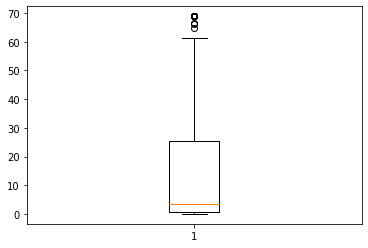

In [168]:
df_train['cash'] = df_train['cash'].replace(np.nan, np.quantile(df_train['cash'].dropna(),.25))
df_train['oth_interest_exp'] = df_train['oth_interest_exp'].replace(np.nan, np.quantile(df_train['oth_interest_exp'].dropna(),.25))
df_train['cash_coverage'] = df_train['cash']/df_train['oth_interest_exp']
df_train['cash_coverage'] = sci.stats.mstats.winsorize(df_train['cash_coverage'], limits =[0.0, 0.15])

print(df_train['cash_coverage'].isnull().sum())
print(df_train['cash_coverage'].describe())
print(df_train['cash_coverage'].value_counts())
plt.boxplot(df_train['cash_coverage'])
plt.show()

#Same procedure for test
df_test['cash'] = df_test['cash'].replace(np.nan, np.quantile(df_test['cash'].dropna(),.5))
df_test['cash'] = sci.stats.mstats.winsorize(df_test['cash'], limits =[0.0, 0.015])

### Profit Margin

\begin{equation*}
Profit\ Margin = \frac{Gross\ Profit}{Sales}
\end{equation*}


In [220]:
df_train['gross_profit'] = df_train['gross_profit'].replace(np.nan, np.quantile(df_train['gross_profit'].dropna(),.25))
df_train['profit_margin'] = df_train['gross_profit']/df_train['sales']
df_train['profit_margin'] = sci.stats.mstats.winsorize(df_train['profit_margin'], limits =[0.0, 0.025])

df_test['gross_profit'] = df_test['gross_profit'].replace(np.nan, np.quantile(df_test['gross_profit'].dropna(),.25))
df_test['profit_margin'] = df_test['gross_profit']/df_test['sales']
df_test['profit_margin'] = sci.stats.mstats.winsorize(df_test['profit_margin'], limits =[0.0, 0.025])

### Equity Ratio 

\begin{equation*}
Equity\ Ratio = \frac{Total\ Equity}{Total\ Assets}
\end{equation*}


In [170]:
np.where(df_train['total_equity'] > 1, df_train['total_equity'], 0)
df_train.loc[df_train.total_equity.isnull(), 'total_equity'] = df_train['total_assets'] - df_train['total_liabilities']
df_train['equity_ratio'] = df_train['total_equity']/df_train['total_assets']

np.where(df_test['total_equity'] > 1, df_test['total_equity'], 0)
df_test.loc[df_test.total_equity.isnull(), 'total_equity'] = df_test['total_assets'] - df_test['total_liabilities']
df_test['equity_ratio'] = df_test['total_equity']/df_test['total_assets']

### Working Capital Ratio
liquidity ratios measuring a companies ability to meet its short term dept obligations

\begin{equation*}
Working\ Capital\ Ratio = \frac{Current\ Assets}{Current\ Liabilities}
\end{equation*}


In [171]:
df_train['wc_ratio'] = df_train['current_assets']/df_train['total_liabilities_st']
df_train['wc_ratio'] = sci.stats.mstats.winsorize(df_train['wc_ratio'], limits =[0, 0.1])

df_test['wc_ratio'] = df_test['current_assets']/df_test['total_liabilities_st']
df_test['wc_ratio'] = sci.stats.mstats.winsorize(df_test['wc_ratio'], limits =[0, 0.01])

### Return on Assets

\begin{equation*}
ROA = \frac{Annual\ Profit}{Total\ Assets}
\end{equation*}


In [236]:
df_train['roa'] = df_train['result_from_ord_bus']/df_train['total_assets']
df_train['roa'] = sci.stats.mstats.winsorize(df_train['roa'], limits =[0.03, 0.05])

df_test['roa'] = df_test['result_from_ord_bus']/df_test['total_assets']
df_test['roa'] = sci.stats.mstats.winsorize(df_test['roa'], limits =[0.03, 0.05])

### Operating Cashflow Ratio 


\begin{equation*}
Operating\ Cashflow\ Ratio = \frac{Operating\ Cashflow}{Sales}
\end{equation*}


In [173]:
ocf_train = np.where(df_train['cf_operating'].between(-1, 1, inclusive=True), 0, df_train['cf_operating'])
df_train['ocf_ratio'] = ocf_train/df_train['total_liabilities_st']
df_train['ocf_ratio'] = sci.stats.mstats.winsorize(df_train['ocf_ratio'], limits =[0.03, 0.05])
# df_train['ocf_ratio'] = ocf_train/df_train['sales']
# df_train['ocf_ratio'] = sci.stats.mstats.winsorize(df_train['ocf_ratio'], limits =[0.01, 0.02])


ocf_test = np.where(df_test['cf_operating'].between(-1, 1, inclusive=True), 0, df_test['cf_operating'])
df_test['ocf_ratio'] = ocf_test/df_test['total_liabilities_st']
df_test['ocf_ratio'] = sci.stats.mstats.winsorize(df_test['ocf_ratio'], limits =[0.03, 0.05])
df_test['ocf_ratio'] = ocf_test/df_test['sales']
# df_test['ocf_ratio'] = sci.stats.mstats.winsorize(df_test['ocf_ratio'], limits =[0.01, 0.02])

\begin{equation*}
Debt-to-Equity\ Ratio = \frac{Total\ Debt}{Total\ Equity}
\end{equation*}


In [174]:
df_train['debt_to_equity'] = np.where(df_train['total_equity'] > 1, df_train['total_liabilities']/df_train['total_equity'], 0)
df_train['debt_to_equity'] = sci.stats.mstats.winsorize(df_train['debt_to_equity'], limits =[0.0, 0.02])

df_test['debt_to_equity'] = np.where(df_test['total_equity'] > 1, df_test['total_liabilities']/df_test['total_equity'], 0)

\begin{equation*}
EBIT\ Margin = \frac{EBIT}{Sales}
\end{equation*}


In [175]:
df_train['ebit_margin'] = df_train['earn_from_op']/df_train['sales']
df_train['ebit_margin'] = sci.stats.mstats.winsorize(df_train['ebit_margin'], limits =[0.02, 0.01])

df_test['ebit_margin'] = df_test['earn_from_op']/df_test['sales']
df_test['ebit_margin'] = sci.stats.mstats.winsorize(df_test['ebit_margin'], limits =[0.02, 0.01])

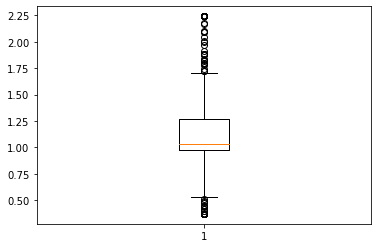

In [240]:
# neue ratio
df_train['neu'] = df_train['earn_from_op']/df_train['result_from_ord_bus']
df_train['neu'] = sci.stats.mstats.winsorize(df_train['neu'], limits =[0.1, 0.1])
plt.boxplot(df_train['neu'])
plt.show()

### Boxplots for Ratios

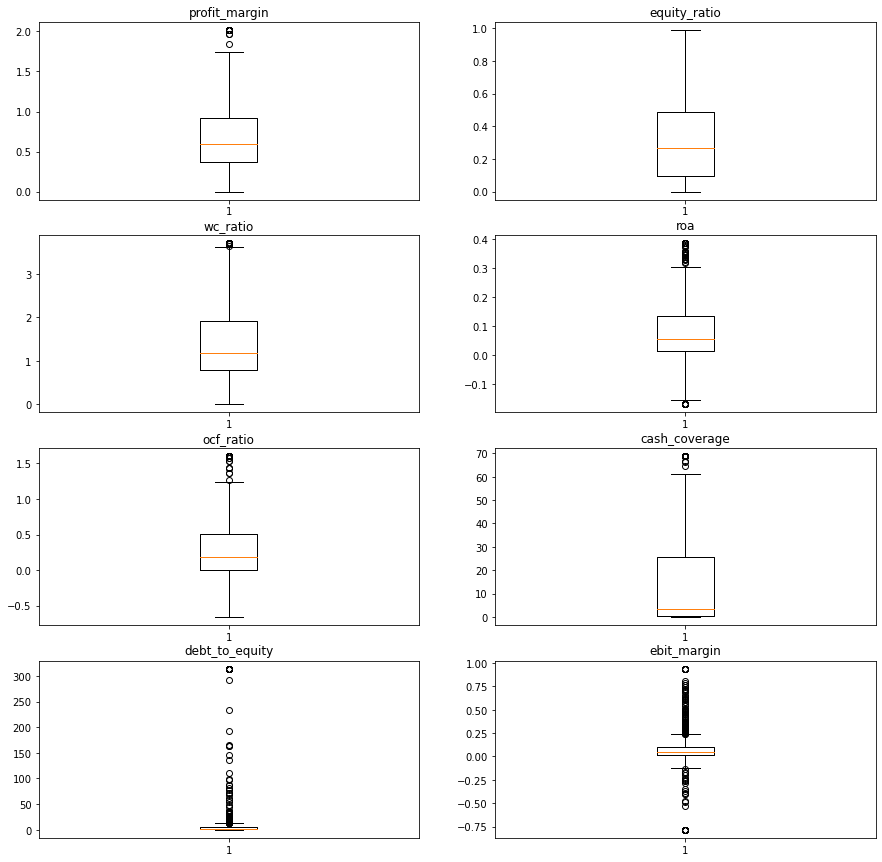

In [237]:
f, ax = plt.subplots(4, 2, figsize=(15, 15))

ax[0,0].boxplot(df_train['profit_margin'])
ax[0,0].set_title('profit_margin')
ax[0,1].boxplot(df_train['equity_ratio'])
ax[0,1].set_title('equity_ratio')
ax[1,0].boxplot(df_train['wc_ratio'])
ax[1,0].set_title('wc_ratio')
ax[1,1].boxplot(df_train['roa'])
ax[1,1].set_title('roa')
ax[2,0].boxplot(df_train['ocf_ratio'])
ax[2,0].set_title('ocf_ratio')
ax[2,1].boxplot(df_train['cash_coverage'])
ax[2,1].set_title('cash_coverage')
ax[3,0].boxplot(df_train['debt_to_equity'])
ax[3,0].set_title('debt_to_equity')
ax[3,1].boxplot(df_train['ebit_margin'])
ax[3,1].set_title('ebit_margin')
plt.show()

## Univariate Analysis

### Univariate Logit Regressions
See the significance of every variable possible in the training set in an univariate setting and where NAs are dropped. We also ordered them according to their p values. Important to note here is the p value is not a KO-criteria for us. Also we do these regressions before data cleansing, which is another important thing to consider. The aim of this is only to see if their is some clear evidence for significant features in the data in the first place.

In [238]:
col_list = df_train.columns[2:]
col_list
dictionary_logit = dict()

for i in range(0,len(col_list)):
    try:
        univ_var = pd.concat((df_train['default'],df_train[col_list[i]]),axis=1)
        y = univ_var["default"]
        X = univ_var.iloc[:,1]
        X = sm.add_constant(X)
        model = sm.Logit(y,X,missing="drop").fit(disp=False,maxiter=100)
        #print(model.summary2()) #comment that out if you don't want to see the regression summary
        pvalue = model.pvalues[1]
        dictionary_logit[col_list[i]] = (pvalue,univ_var.iloc[:,1].isnull().sum())
    except:
        continue

In [239]:
dictionary_logit = pd.DataFrame.from_dict(dictionary_logit,orient="index",columns=['P-Value','NAs']).sort_values(by="P-Value")
dictionary_logit

,P-Value,NAs
equity_ratio,0.000102,0
cash_coverage,0.010210,0
wc_ratio,0.025687,0
cash,0.037574,0
year_inc,0.055778,0
total_equity,0.080663,0
roa,0.095320,0
neu,0.138102,0
gross_profit,0.158572,0
profit_margin,0.164943,0


Speaking in an univariate context, what we can see here is that no variable shows a very strong significance in the univariate logistic regression with the default variable as dependent variable. Also some variables can be disregarded as their numerical value makes no sense (e.g.: year_inc).  Thus we can argue, that a focus on economic reasoning instead of p-values in the univariate context is a better way to go. 

### Mann-Whitney U Test
Also we perform a Mann-Whitney U Test for all variables to see if there is a difference in those variables between default and non default firms.

In [180]:
col_list

dictionary_mannu = dict()

for i in range(0,len(col_list)):
    try: 
        group_default = df_train[df_train["default"]==1][col_list[i]]
        group_non_default = df_train[df_train["default"]==0][col_list[i]]
        test_stat, pvalue = sci.stats.mannwhitneyu(group_default,group_non_default)
        dictionary_mannu[col_list[i]] = test_stat, pvalue, df_train[col_list[i]].isnull().sum()
    except:
        continue


In [181]:
dictionary_mannu = pd.DataFrame.from_dict(dictionary_mannu,orient="index",
                       columns=['Test statistic','P-Value','NAs']).sort_values(by="P-Value")
dictionary_mannu

,Test statistic,P-Value,NAs
cash_coverage,6364.5,5.866965e-07,0
equity_ratio,6800.0,3.820160e-06,0
total_equity,7142.0,1.464164e-05,0
cash,7348.0,3.159452e-05,0
trade_receivables_lt,8295.0,7.347649e-04,644
trade_payables_lt,8433.0,1.102325e-03,664
bonds_payables_lt,8470.0,1.226194e-03,668
bonds_payables_st,8470.0,1.226194e-03,668
monetary_current_assets,8691.0,2.270867e-03,0
bonds_payables_mt,8853.0,3.491735e-03,663


In [182]:
#merge both results together
summary = pd.concat((dictionary_logit.iloc[:,0],dictionary_mannu.iloc[:,1:]),axis=1,)
summary.columns = ["P-Value Univ. Logit","P-Value MannU","NAs"]
summary

,P-Value Univ. Logit,P-Value MannU,NAs
equity_ratio,0.000102,3.820160e-06,0
cash_coverage,0.010210,5.866965e-07,0
wc_ratio,0.025687,9.430937e-03,0
cash,0.037574,3.159452e-05,0
year_inc,0.055778,2.553585e-01,0
total_equity,0.080663,1.464164e-05,0
roa,0.095320,7.322908e-02,0
neu,0.138102,7.411476e-02,0
gross_profit,0.158572,1.280942e-02,0
profit_margin,0.164943,7.004908e-02,0


### Categorical Variables

In [183]:
catvar = [i for i in list(df_train.columns)[1:] if df_train[i].dtype=='O']

for i in catvar:
    tmp1 = pd.crosstab(df_train['default'], df_train[i]).apply(lambda x: np.round(x/x.sum() * 100,2)).T.sort_values(by = i ,ascending=False)
    tmp2 = pd.crosstab(df_train['default'], df_train[i]).T.rename(columns={False: 'N_False', True: 'N_True'})
    tmp3 = pd.DataFrame(tmp2.apply(sum, axis=1), columns=['N'])
    tmp4 = tmp3.apply(lambda x: np.round(x/x.sum() * 100,2)).rename(columns={'N': 'N_Perc'})
    tmp = tmp1.join(tmp2).join(tmp3).join(tmp4)
    print('====================================================')
    print('Variable: ',i)
    print('---------------------------------------------------')
    print(tmp)
    print()
    del tmp1, tmp2, tmp3, tmp4, tmp

Variable:  legal_form
---------------------------------------------------
                              0      1  N_False  N_True    N  N_Perc
legal_form                                                          
Verein                   100.00   0.00        1       0    1    0.15
Sonst. Gewerbetreibende   88.24  11.76       15       2   17    2.54
OHG                      100.00   0.00        4       0    4    0.60
KG                        80.00  20.00        4       1    5    0.75
GmbH & Co. KG             91.67   8.33       88       8   96   14.37
GmbH                      95.04   4.96      460      24  484   72.46
Genossenschaft           100.00   0.00       15       0   15    2.25
Freiberufler              80.00  20.00        4       1    5    0.75
Einzelfirma               88.89  11.11        8       1    9    1.35
BGB-Gesellschaft         100.00   0.00        4       0    4    0.60
AG                        96.43   3.57       27       1   28    4.19

Variable:  type_pl
---------

# Our Variables of interest
In this section we want to focus on our variables of interest, which are mainly choosen because of economic reasoning. These are:

- Age
- Cash
- Profit Margin
- EBIT Margin
- Working Capital Ratio
- Operating Cashflow Ratio
- Equity Ratio
- Debt-to-Equity Ratio
- Return on Assets

## Results of both univariate Tests

As already stated before, economic reasoning is our main argument to choose a variable for our regression. Nevertheless it is important to see the results of the univariate tests in the section before.

In [184]:
col_list = ["age_num","cash","profit_margin","ebit_margin","wc_ratio","ocf_ratio","equity_ratio","debt_to_equity","roa"]
summary.loc[col_list,:]

,P-Value Univ. Logit,P-Value MannU,NAs
age_num,0.721892,0.256055,0
cash,0.037574,0.000032,0
profit_margin,0.164943,0.070049,0
ebit_margin,0.567159,0.284780,0
wc_ratio,0.025687,0.009431,0
ocf_ratio,0.258850,0.088437,0
equity_ratio,0.000102,0.000004,0
debt_to_equity,0.699450,0.116385,0
roa,0.095320,0.073229,0


## Visualize differences in our variables of interest between default and non default 

Here we just want to visualize the difference in our variables of interest between default and non default firms in our training dataset.

In [185]:
col_list = ["default","age_num","cash","profit_margin","ebit_margin","wc_ratio","ocf_ratio","equity_ratio","debt_to_equity","roa"]
df_train[col_list]

,default,age_num,cash,profit_margin,ebit_margin,wc_ratio,ocf_ratio,equity_ratio,debt_to_equity,roa
0,0,121.0,10297047.50,0.361114,0.061157,3.710767,0.949635,7.385670e-01,0.352444,0.180537
1,0,45.0,926383.75,1.104725,0.027363,0.663710,-0.617484,3.896983e-01,1.560542,0.095967
2,0,59.0,9146283.79,2.012151,0.023240,3.328108,1.130863,9.370190e-04,163.778649,0.001684
3,0,49.0,6890565.23,2.012151,0.133260,3.193566,0.665113,5.925318e-01,0.236311,0.030412
4,0,113.0,5036615.09,1.135876,0.489225,0.102055,0.374604,4.174963e-01,1.329259,0.040158
...,...,...,...,...,...,...,...,...,...,...
664,0,44.0,31000.00,0.506472,0.013336,0.835583,0.026441,1.823358e-01,4.484386,-0.001518
665,0,21.0,252537.31,0.446851,0.047281,1.213142,-0.475269,3.418227e-01,1.925494,0.173649
666,0,21.0,573037.66,1.000000,0.298976,0.041927,0.009356,-3.086604e-17,0.000000,0.013497
667,0,14.0,5652.17,1.049012,0.053456,0.615002,0.220748,-1.273479e-16,0.000000,0.063753


### Age

AttributeError: module 'seaborn' has no attribute 'displot'

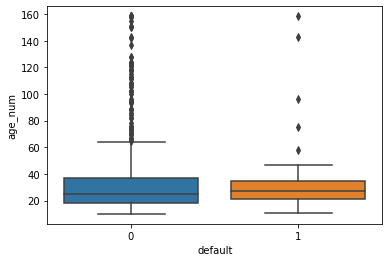

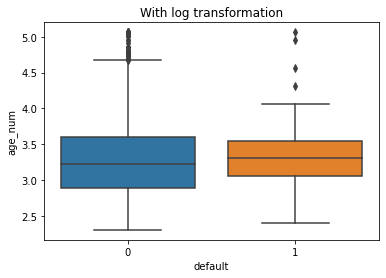

<Figure size 432x288 with 0 Axes>

In [187]:
sns.boxplot(y="age_num",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["age_num"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="age_num",hue="default",stat="density",common_norm=False);

### Cash

AttributeError: module 'seaborn' has no attribute 'displot'

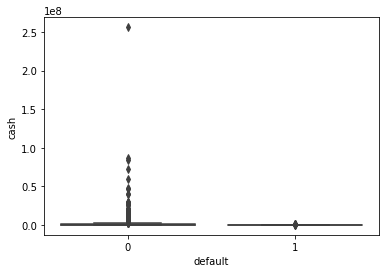

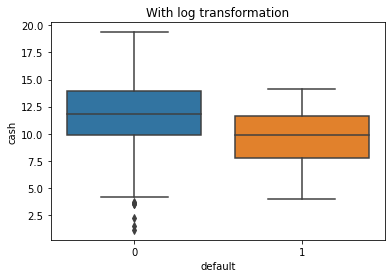

<Figure size 432x288 with 0 Axes>

In [188]:
sns.boxplot(y="cash",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["cash"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x=np.log(df_train["cash"]),hue="default",stat="density",common_norm=False)
plt.title("Log transformed");

### Profit Margin

AttributeError: module 'seaborn' has no attribute 'displot'

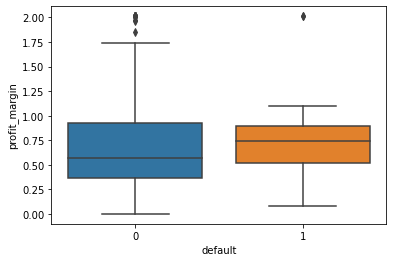

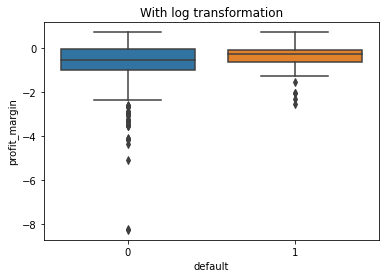

<Figure size 432x288 with 0 Axes>

In [189]:
sns.boxplot(y="profit_margin",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["profit_margin"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="profit_margin",hue="default",stat="density",common_norm=False);

### Ebit Margin

AttributeError: module 'seaborn' has no attribute 'displot'

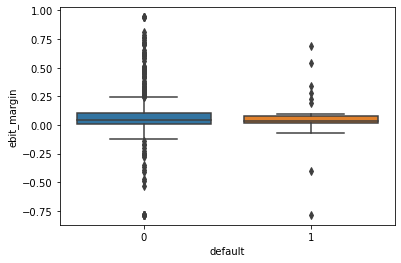

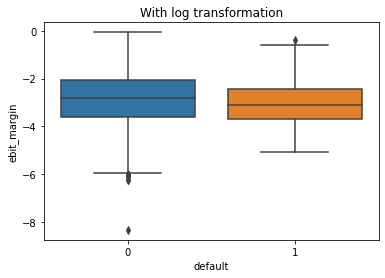

<Figure size 432x288 with 0 Axes>

In [190]:
sns.boxplot(y="ebit_margin",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["ebit_margin"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="ebit_margin",hue="default",stat="density",common_norm=False);

### Working Capital Ratio

In [ ]:
sns.boxplot(y="wc_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["wc_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="wc_ratio",hue="default",stat="density",common_norm=False);

### Operating Cash Flow Ratio

AttributeError: module 'seaborn' has no attribute 'displot'

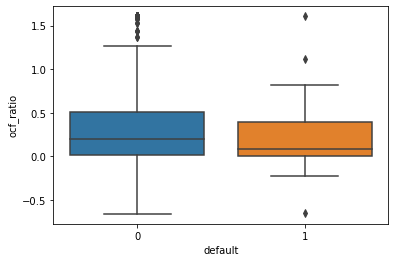

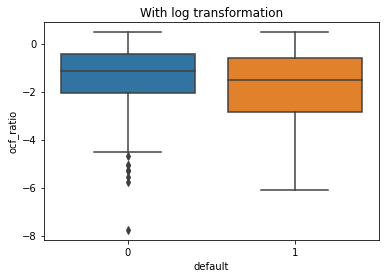

<Figure size 432x288 with 0 Axes>

In [191]:
sns.boxplot(y="ocf_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["ocf_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="ocf_ratio",hue="default",stat="density",common_norm=False);

### Equity Ratio 

AttributeError: module 'seaborn' has no attribute 'displot'

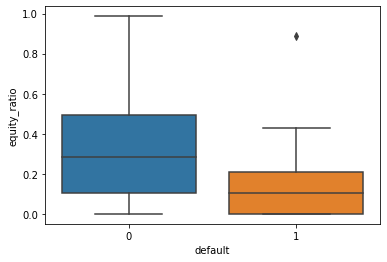

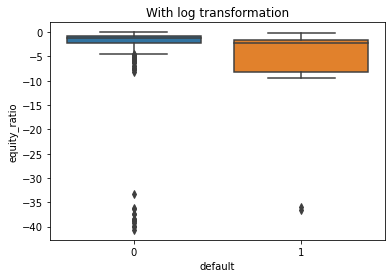

<Figure size 432x288 with 0 Axes>

In [192]:
sns.boxplot(y="equity_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["equity_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="equity_ratio",hue="default",stat="density",common_norm=False);

### Debt-to-Equity Ratio

AttributeError: module 'seaborn' has no attribute 'displot'

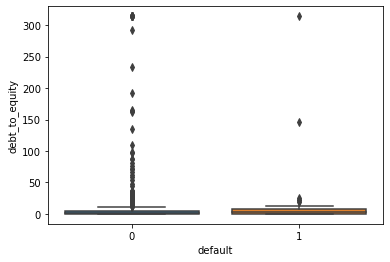

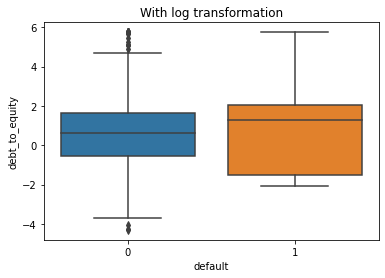

<Figure size 432x288 with 0 Axes>

In [193]:
sns.boxplot(y="debt_to_equity",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["debt_to_equity"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
data = df_train[df_train["debt_to_equity"] < 50]
sns.displot(data,x="debt_to_equity",hue="default",stat="density",common_norm=False)
plt.title("Only D/E Ratio up to 50");

## Multivariate Analysis - Correlation Matrix/Heatmap

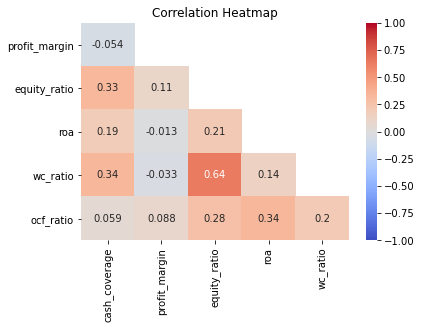

,cash_coverage,profit_margin,equity_ratio,roa,wc_ratio
profit_margin,-0.054233,1.000000,0.107217,-0.013467,-0.032525
equity_ratio,0.332076,0.107217,1.000000,0.214094,0.639378
roa,0.191741,-0.013467,0.214094,1.000000,0.141487
wc_ratio,0.337210,-0.032525,0.639378,0.141487,1.000000
ocf_ratio,0.059070,0.088445,0.275093,0.343695,0.203809


In [194]:
col = ['cash_coverage', 'profit_margin', 'equity_ratio', 'roa', 'wc_ratio', 'ocf_ratio']
data = df_train[col]
df_corr = data.corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = pd.DataFrame(df_corr.iloc[1:,:-1].copy())

heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap="coolwarm")
heatmap.set_title('Correlation Heatmap')
plt.show()

corr

## Univariate Ginis of our Variables of interest
Here we want to calculate the Gini coefficients, resulting from a logit model with only one variable of our interest. 

In [195]:
col_list = ["default","cash_coverage","profit_margin","wc_ratio","ocf_ratio","equity_ratio","roa"]
df_train[col_list]

,default,cash_coverage,profit_margin,wc_ratio,ocf_ratio,equity_ratio,roa
0,0,24.319201,0.361114,3.710767,0.949635,7.385670e-01,0.180537
1,0,68.910169,1.104725,0.663710,-0.617484,3.896983e-01,0.095967
2,0,68.910169,2.012151,3.328108,1.130863,9.370190e-04,0.001684
3,0,68.910169,2.012151,3.193566,0.665113,5.925318e-01,0.030412
4,0,0.473313,1.135876,0.102055,0.374604,4.174963e-01,0.040158
...,...,...,...,...,...,...,...
664,0,0.077889,0.506472,0.835583,0.026441,1.823358e-01,-0.001518
665,0,58.830851,0.446851,1.213142,-0.475269,3.418227e-01,0.173649
666,0,0.071810,1.000000,0.041927,0.009356,-3.086604e-17,0.013497
667,0,2.219296,1.049012,0.615002,0.220748,-1.273479e-16,0.063753


In [196]:
dictionary_univ_gini = dict()
for var in col_list[1:]:
    X = df_train[var]
    y = df_train["default"]
    X = sm.add_constant(X)

    random_numbers = np.random.randint(0,1000000,1000)

    for i in random_numbers:
        try:
            # Splitting data into training and testing sets.
            train_features, test_features, train_labels, test_labels = train_test_split(X, 
                                                                                y, test_size = 0.33, 
                                                                                random_state = i, 
                                                                                stratify = y)
            # The splited Logit Model
            mdl2split = sm.Logit(train_labels,train_features).fit()
            mdl2split.summary2()

            # Predict the test data
            predictions_split = mdl2split.predict(test_features)
            # Predict the training data
            predictions_split_train = mdl2split.predict(train_features)
            # Calculate the absolute errors
            errors = abs(predictions_split - test_labels)
    
            #AUC & Gini Graph + Calculations of splitted logit

            fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
            auc_split = metrics.auc(fpr_split, tpr_split) 

            # Predict the in sample (train) data for comparision
            fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
            auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)
    
            #Store values in dictionary
            dictionary_univ_gini[i] = round(np.mean(errors), 2),auc_split,2*auc_split-1, auc_split_train, 2*auc_split_train-1,var
        
        except:
            continue

dictionary_univ_gini = pd.DataFrame.from_dict(dictionary_univ_gini,orient="index",
                       columns=['MSE','AUC out sample','Gini out of sample',"AUC in sample","Gini in sample","Variable"])

;

Optimization terminated successfully.
         Current function value: 0.195610
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.199253
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.194964
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.196930
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.191161
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195745
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.197130
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.189434
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197572
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.1

Optimization terminated successfully.
         Current function value: 0.194008
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.193328
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197725
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.197917
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.196201
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.199229
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.196273
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.196774
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.197718
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.1

         Current function value: 0.192826
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.196755
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.188453
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.188755
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195052
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.196242
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.198252
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.199671
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.184774
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.183746
         Iterations 11
Optimiza

Optimization terminated successfully.
         Current function value: 0.194886
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.194273
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.184248
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.191258
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193158
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.198457
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.199289
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.196996
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.193419
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.194568
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.198546
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.196320
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.196154
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.193085
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196453
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.193179
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194476
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.184664
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.196341
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.197240
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.196396
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.191704
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197556
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.198657
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.198428
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.189906
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197849
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.194554
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.195786
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.193101
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.195115
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.192721
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196572
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.195864
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.196123
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.194697
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.193127
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.192801
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197895
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.198013
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.195939
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.194310
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.198115
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.192744
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196666
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

         Iterations 10
Optimization terminated successfully.
         Current function value: 0.197643
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.198756
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.183070
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.178402
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.189054
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196056
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.187016
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194050
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.194860
         Iterations 10
Optimization terminated successfully.
         Cur

Optimization terminated successfully.
         Current function value: 0.194007
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.193483
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197224
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.197783
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.195377
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.194249
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.190601
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195473
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.193390
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.194283
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.197437
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.191115
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193996
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.197782
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.196692
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.197209
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.189508
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190074
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.191892
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198230
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.196539
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.197971
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.198079
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.188972
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.193903
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.194683
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.198714
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.212953
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213639
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214120
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211751
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214031
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214381
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215167
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213360
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.208530
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215288
  

Optimization terminated successfully.
         Current function value: 0.215007
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213493
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214952
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211490
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214816
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214783
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215576
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213070
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214785
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215570
  

Optimization terminated successfully.
         Current function value: 0.212154
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214315
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214346
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210755
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212787
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215478
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214220
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214255
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214090
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213409
  

Optimization terminated successfully.
         Current function value: 0.215608
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213416
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214520
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213941
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215549
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215368
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215348
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213639
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212510
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209901
  

Optimization terminated successfully.
         Current function value: 0.210622
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215087
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213753
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215373
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213836
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215471
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215029
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213604
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211748
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214955
  

Optimization terminated successfully.
         Current function value: 0.215434
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215614
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213603
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214608
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213854
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213825
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212555
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214988
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215604
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212985
  

Optimization terminated successfully.
         Current function value: 0.213760
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215355
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212401
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214930
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209709
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214039
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210094
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212607
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214581
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213235
  

Optimization terminated successfully.
         Current function value: 0.213839
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211920
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213244
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209619
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214102
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213313
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214179
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214509
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215151
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214902
  

Optimization terminated successfully.
         Current function value: 0.215607
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214161
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214568
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214792
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214894
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215614
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210935
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213897
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213636
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212460
  

Optimization terminated successfully.
         Current function value: 0.213307
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213694
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212846
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212219
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214978
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214845
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215028
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214011
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211933
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212007
  

Optimization terminated successfully.
         Current function value: 0.213306
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214067
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215391
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213462
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211823
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215048
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213872
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213890
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215572
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214247
  

Optimization terminated successfully.
         Current function value: 0.211992
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215527
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212583
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212929
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215489
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210717
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213944
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214922
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215210
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215051
  

Optimization terminated successfully.
         Current function value: 0.210411
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211037
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210240
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211616
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212515
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211273
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.206311
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207892
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212454
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213644
  

Optimization terminated successfully.
         Current function value: 0.210012
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213219
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214794
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215042
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211393
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212421
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212456
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214069
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209217
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.214093
  

Optimization terminated successfully.
         Current function value: 0.204669
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206884
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207991
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211194
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212709
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211462
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210476
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210717
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213128
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209218
  

Optimization terminated successfully.
         Current function value: 0.211659
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210807
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209456
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212199
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211882
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213500
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211737
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210663
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209273
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204341
  

         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211749
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.207640
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208995
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.214741
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211169
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212967
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.207198
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209709
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213055
         Iterations 7
Optimization terminated successfully.
         Current funct

Optimization terminated successfully.
         Current function value: 0.208659
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203634
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210655
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.207750
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212210
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212601
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.208374
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210096
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211228
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214965
  

Optimization terminated successfully.
         Current function value: 0.213295
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214594
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.208047
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211493
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212679
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.203730
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208167
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211016
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210828
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211215
  

Optimization terminated successfully.
         Current function value: 0.211529
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213265
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214769
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213670
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.208633
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211589
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.208225
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208482
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209125
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212776
  

Optimization terminated successfully.
         Current function value: 0.210063
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210706
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214710
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.207850
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.214519
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209621
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209285
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211670
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210876
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211075
  

Optimization terminated successfully.
         Current function value: 0.209866
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210674
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.207492
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208854
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207700
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212557
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212379
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.208805
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208299
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210055
  

Optimization terminated successfully.
         Current function value: 0.207088
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211828
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209435
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211817
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212794
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212316
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209618
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212528
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211242
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211997
  

Optimization terminated successfully.
         Current function value: 0.213192
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.207177
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212534
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209767
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213178
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209230
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212368
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.207035
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210628
  

Optimization terminated successfully.
         Current function value: 0.213690
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215550
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215613
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215605
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215131
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215246
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215093
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214882
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214108
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213081
  

Optimization terminated successfully.
         Current function value: 0.215575
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213648
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215600
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213947
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215360
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213286
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215520
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214460
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215612
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213557
  

Optimization terminated successfully.
         Current function value: 0.215515
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215603
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215575
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215118
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213729
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214415
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212998
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213248
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215147
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214821
  

Optimization terminated successfully.
         Current function value: 0.215086
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212905
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214633
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215358
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214171
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212718
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214915
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214595
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214071
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214717
  

Optimization terminated successfully.
         Current function value: 0.214409
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214382
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215419
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213247
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214928
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215234
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215597
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215381
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214290
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214035
  

Optimization terminated successfully.
         Current function value: 0.213776
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213475
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215614
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214321
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214150
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212723
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214855
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215260
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213900
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215494
  

Optimization terminated successfully.
         Current function value: 0.207633
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211991
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214200
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213607
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214709
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215326
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215548
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215233
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213238
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214192
  

Optimization terminated successfully.
         Current function value: 0.214802
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215064
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214461
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214419
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214798
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215245
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214480
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215357
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213535
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215612
  

Optimization terminated successfully.
         Current function value: 0.214593
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213996
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214158
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215606
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215497
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214075
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214306
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214399
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215183
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215453
  

Optimization terminated successfully.
         Current function value: 0.212853
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214912
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214698
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211481
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214939
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215614
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214802
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214928
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215008
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213856
  

Optimization terminated successfully.
         Current function value: 0.211410
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215306
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214465
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214090
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214588
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215172
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214600
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214555
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214543
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213341
  

Optimization terminated successfully.
         Current function value: 0.194642
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203549
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201894
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.191797
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.195152
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204657
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.194497
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198899
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199285
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203957
  

Optimization terminated successfully.
         Current function value: 0.200546
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203971
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200848
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207504
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197593
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201204
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206941
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.192575
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199831
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197017
  

Optimization terminated successfully.
         Current function value: 0.202806
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202961
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200869
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203022
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205465
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197688
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205316
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204189
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.186920
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.202733
  

Optimization terminated successfully.
         Current function value: 0.200992
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202795
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197887
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200470
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198687
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.190449
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.204594
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203165
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197169
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200918
  

Optimization terminated successfully.
         Current function value: 0.205838
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203723
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199355
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203677
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199113
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199710
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204283
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199312
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198931
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200168
  

Optimization terminated successfully.
         Current function value: 0.199043
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199394
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201108
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201325
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198922
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202031
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200377
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199406
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202163
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.193720
  

Optimization terminated successfully.
         Current function value: 0.189765
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.203271
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207425
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204269
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.194288
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.191600
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.201587
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199559
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207671
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197371
  

Optimization terminated successfully.
         Current function value: 0.200154
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199079
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.193045
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206567
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204939
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201913
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201682
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.194872
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200952
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201817
  

Optimization terminated successfully.
         Current function value: 0.195348
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.196254
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.194791
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198602
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202467
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200350
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.192399
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.199602
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202527
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202576
  

         Iterations 8
Optimization terminated successfully.
         Current function value: 0.196173
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.194354
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197791
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200258
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200142
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201819
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199080
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209210
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202496
         Iterations 8
Optimization terminated successfully.
         Current funct

Optimization terminated successfully.
         Current function value: 0.202664
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.195618
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200411
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.193208
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200331
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201347
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207996
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202140
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198321
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206514
  

Optimization terminated successfully.
         Current function value: 0.202890
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203863
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198291
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201407
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202551
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.189271
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.203865
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197335
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199834
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202176
  

Optimization terminated successfully.
         Current function value: 0.214426
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214333
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214203
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212547
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213968
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212677
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213700
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214888
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215244
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213904
  

Optimization terminated successfully.
         Current function value: 0.213880
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213183
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210567
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214489
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.208614
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213833
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210111
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213858
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211917
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214500
  

Optimization terminated successfully.
         Current function value: 0.214570
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214487
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214335
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214820
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214589
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213686
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213562
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215020
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215264
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214539
  

Optimization terminated successfully.
         Current function value: 0.209576
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.214957
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215122
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214149
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213185
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212377
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213897
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213773
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215177
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215025
  

Optimization terminated successfully.
         Current function value: 0.211284
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213838
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215394
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213409
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214260
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213739
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215165
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211133
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213849
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215233
  

Optimization terminated successfully.
         Current function value: 0.213655
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210628
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214300
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214461
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215044
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214524
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210862
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213925
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213106
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211414
  

Optimization terminated successfully.
         Current function value: 0.212420
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214700
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214454
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212092
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211457
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210553
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.208109
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212335
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214690
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212410
  

Optimization terminated successfully.
         Current function value: 0.214049
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.207292
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211421
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214904
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211740
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212450
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211261
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214142
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215073
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213085
  

Optimization terminated successfully.
         Current function value: 0.213652
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213662
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213654
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214186
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212817
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215305
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213737
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213714
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213976
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211209
  

Optimization terminated successfully.
         Current function value: 0.214325
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214598
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212552
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211377
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213240
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215149
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213985
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213544
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210986
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214397
  

Optimization terminated successfully.
         Current function value: 0.213085
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211346
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211964
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211482
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210712
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212598
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213742
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213217
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213601
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214612
  

''

In [197]:
for i in col_list[1:]:
    print("Mean Gini out of sample with variable:", i, 
          dictionary_univ_gini["Gini out of sample"][dictionary_univ_gini["Variable"]==i].mean())
    

Mean Gini out of sample with variable: cash_coverage 0.468610897584869
Mean Gini out of sample with variable: profit_margin 0.11711057766718651
Mean Gini out of sample with variable: wc_ratio 0.2254548965690017
Mean Gini out of sample with variable: ocf_ratio 0.11621708728404745
Mean Gini out of sample with variable: equity_ratio 0.43328002158162504
Mean Gini out of sample with variable: roa 0.14289755917159772


In [198]:
# Gini with only cash and wc ratio
var = ["cash","wc_ratio"]
dictionary_logit_two_vars = dict()
X = df_train[var]
y = df_train["default"]
X = sm.add_constant(X)

random_numbers = np.random.randint(0,1000000,1000)

for i in random_numbers:
    try:
        # Splitting data into training and testing sets.
        train_features, test_features, train_labels, test_labels = train_test_split(X, 
                                                                                y, test_size = 0.33, 
                                                                                random_state = i, 
                                                                                stratify = y)
        # The splited Logit Model
        mdl2split = sm.Logit(train_labels,train_features).fit()
        mdl2split.summary2()

        # Predict the test data
        predictions_split = mdl2split.predict(test_features)
        # Predict the training data
        predictions_split_train = mdl2split.predict(train_features)
        # Calculate the absolute errors
        errors = abs(predictions_split - test_labels)
    
        #AUC & Gini Graph + Calculations of splitted logit

        fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
        auc_split = metrics.auc(fpr_split, tpr_split) 

        # Predict the in sample (train) data for comparision
        fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
        auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)
    
        #Store values in dictionary
        dictionary_logit_two_vars[i] = round(np.mean(errors), 2),auc_split,2*auc_split-1, auc_split_train, 2*auc_split_train-1
        
    except:
        continue

dictionary_logit_two_vars = pd.DataFrame.from_dict(dictionary_logit_two_vars,orient="index",
                       columns=['MSE','AUC out sample','Gini out of sample',"AUC in sample","Gini in sample"])


Optimization terminated successfully.
         Current function value: 0.195425
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.200686
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.189897
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.195840
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.200509
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201616
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201215
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.203116
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.200401
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.196954
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.204907
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196808
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.204403
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202798
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202497
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200767
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.202325
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198323
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.202209
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.193261
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.203992
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.199405
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.196127
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.198077
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.198620
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.202471
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.200392
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.204811
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202126
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.200667
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.204648
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.195876
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.200424
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.200067
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202395
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198357
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.203359
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.202136
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196127
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.203679
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.198686
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.200127
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196745
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.203194
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200541
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.200158
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.198980
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198636
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.202047
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.200699
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196101
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.198072
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.199670
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.202606
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.205398
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200369
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.203633
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200895
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.200157
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202536
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.199633
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.195750
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198261
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.201423
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.196834
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.202150
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.200118
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.197966
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.200960
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.193197
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.200342
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.195596
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.202925
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201183
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197694
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.202681
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.195908
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.200423
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.204093
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201928
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.192518
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.200745
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.200013
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.199273
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.197888
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.198641
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.197582
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.197744
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.199625
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.196223
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.200749
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.199431
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.193819
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.197388
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.200019
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201339
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.194912
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.197151
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.198496
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.200818
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.198442
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.200624
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.198441
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.203150
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.203869
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.199574
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.201538
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201587
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

In [199]:
dictionary_logit_two_vars.mean() #gini does not get better

MSE                   0.106310
AUC out sample        0.671795
Gini out of sample    0.343590
AUC in sample         0.687856
Gini in sample        0.375712
dtype: float64

# Our Logit Regression

In [225]:
# cash_coverage + profit_margin + ebit_margin + wc_ratio + ocf_ratio + equity_ratio + debt_to_equity + roa + 1'
mdl1 = sm.Logit.from_formula('default ~ equity_ratio + profit_margin + wc_ratio + roa + 1',
                            data=df_train).fit(disp=False, maxiter=100)
print(mdl1.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.084     
Dependent Variable: default          AIC:              277.2322  
Date:               2021-01-11 16:52 BIC:              299.7536  
No. Observations:   668              Log-Likelihood:   -133.62   
Df Model:           4                LL-Null:          -145.83   
Df Residuals:       663              LLR p-value:      6.5388e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -2.4562   0.4311 -5.6971 0.0000 -3.3012 -1.6112
equity_ratio      -3.8535   1.0605 -3.6337 0.0003 -5.9321 -1.7750
profit_margin      0.6984   0.4131  1.6907 0.0909 -0.1112  1.5081
wc_ratio           0.0784   0.2082  

In [226]:
y = df_train["default"]
X = df_train[['equity_ratio', 'profit_margin', 'wc_ratio', 'roa']]
X = sm.add_constant(X)


mdl2 = sm.Logit(y,X).fit()
mdl2.summary2()

Optimization terminated successfully.
         Current function value: 0.200024
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.084     
Dependent Variable: default          AIC:              277.2322  
Date:               2021-01-11 16:52 BIC:              299.7536  
No. Observations:   668              Log-Likelihood:   -133.62   
Df Model:           4                LL-Null:          -145.83   
Df Residuals:       663              LLR p-value:      6.5388e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -2.4562   0.4311 -5.6971 0.0000 -3.3012 -1.6112
equity_ratio      -3.8535   1.0605 -3.6337 0.0003 -5.9321 -1.7750
profit_margin      0.6984   0.4131  1.6907 0.0909 -0.1112  1.5081
wc_ratio           0.0784   0.2082  0.3765 0.7066 -0.3297  0.4865
roa               -0.9771   1.4859 -0.6576 0.5108 -3.8895  1.9352
=================================================================

"""

In [227]:
# see how our model would have predicted the defaults 
s = pd.concat([df_train["default"],round(mdl1.predict(X)*100,2)],axis=1,)
s.columns = ["default","estimated PD in %"]
s.sort_values(by="estimated PD in %",ascending=False)

,default,estimated PD in %
2,0,31.10
544,0,25.59
212,1,24.25
209,0,24.14
481,0,18.30
...,...,...
26,0,0.38
234,0,0.37
480,0,0.34
524,0,0.33


In [228]:
s[s["default"] == 1]

,default,estimated PD in %
32,1,10.73
43,1,12.29
69,1,9.19
104,1,10.56
114,1,17.89
120,1,5.57
128,1,6.95
139,1,9.73
150,1,13.39
198,1,11.45


In [229]:
# Splitting data into training and testing sets.
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
 
# The splited Logit Model
mdl2split = sm.Logit(train_labels,train_features).fit()
mdl2split.summary2()

# Predict the test data
predictions_split = mdl2split.predict(test_features)
# Predict the training data
predictions_split_train = mdl2split.predict(train_features)

# Calculate the absolute errors
errors = abs(predictions_split - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

Optimization terminated successfully.
         Current function value: 0.196946
         Iterations 8
Mean Absolute Error: 0.1 .


Out sample: 
AUC (LY):   0.6765873015873016
GINI (LY):  0.35317460317460325


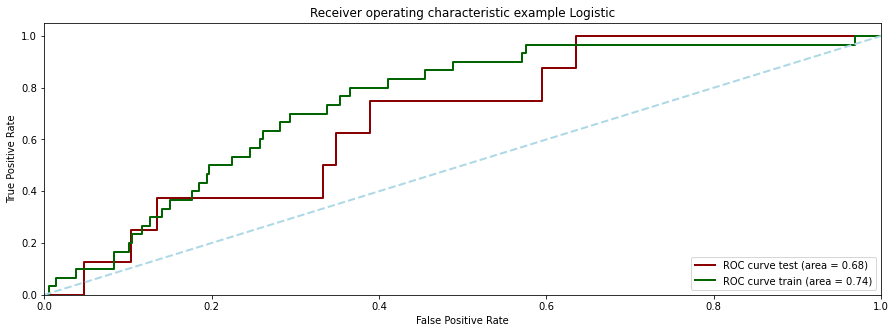

In [230]:
#AUC & Gini Graph + Calculations of splitted logit

fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
auc_split = metrics.auc(fpr_split, tpr_split) 

#Predict the in sample (train) data for comparision
fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr_split, tpr_split, color='darkred',
         lw=lw, label='ROC curve test (area = %0.2f)' % auc_split)
axes = plt.plot(fpr_split_train, tpr_split_train, color='darkgreen',
         lw=lw, label='ROC curve train (area = %0.2f)' % auc_split_train)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Logistic')
plt.legend(loc="lower right")

print("Out sample: ")
print('AUC (LY):  ',auc_split)
print('GINI (LY): ', 2*auc_split -1)

In sample: 
AUC L1:   0.7307435254803676
GINI L1:  0.46148705096073517
AUC L2:   0.7307435254803676
GINI L2:  0.46148705096073517
Splitted Logit Regression
Out sample: 
AUC Test Sample:   0.6765873015873016
GINI Test Sample:  0.35317460317460325


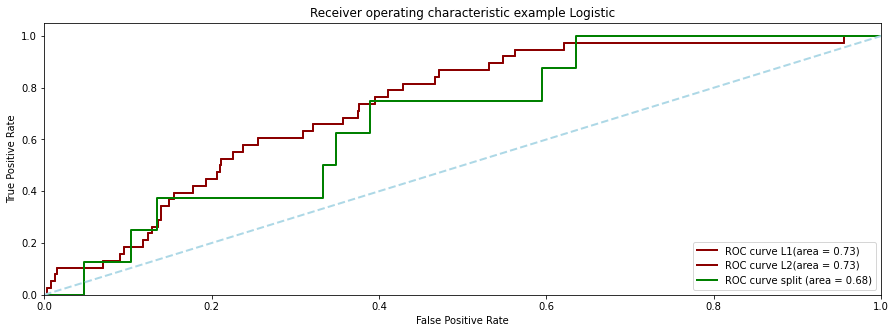

In [231]:
#AUC & Gini Graph + Calculations of old logit regression (red) splitted logit regression (green)
predictions_L1 = mdl1.predict(X)
predictions_L2 = mdl2.predict(X)
#AUC & Gini Graph + Calculations
fpr_L1, tpr_L1, thresholds_L1 = metrics.roc_curve(df_train['default'], predictions_L1)
auc_L1 = metrics.auc(fpr_L1, tpr_L1)

fpr_L2, tpr_L2, thresholds_L2 = metrics.roc_curve(df_train['default'], predictions_L2)
auc_L2 = metrics.auc(fpr_L2, tpr_L2)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr_L1, tpr_L1, color='darkred',
         lw=lw, label='ROC curve L1(area = %0.2f)' % auc_L1)
axes = plt.plot(fpr_L2, tpr_L2, color='darkred',
         lw=lw, label='ROC curve L2(area = %0.2f)' % auc_L2)
axes = plt.plot(fpr_split, tpr_split, color='green',
         lw=lw, label='ROC curve split (area = %0.2f)' % auc_split)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Logistic')
plt.legend(loc="lower right")

print("In sample: ")
print('AUC L1:  ',auc_L1)
print('GINI L1: ', 2*auc_L1 -1)
print('AUC L2:  ',auc_L2)
print('GINI L2: ', 2*auc_L2 -1)
print('Splitted Logit Regression')
print("Out sample: ")
print('AUC Test Sample:  ',auc_split)
print('GINI Test Sample: ', 2*auc_split -1)

Our out of sample Gini here highly depends on the random_state we define in out test and train split. Thus multiple different random states are here simulated. Also the test size here is increased to 0.33 as this will be similiar to the sizes of our train (668 firms) and test (330) firms.

In [ ]:
# Generate random numbers for different states
#np.random.seed(220497)
random_numbers = np.random.randint(0,1000000,10000)
dictionary_random_test = dict()

for i in random_numbers:
    try:
        # Splitting data into training and testing sets.
        train_features, test_features, train_labels, test_labels = train_test_split(X, 
                                                                                y, test_size = 0.33, 
                                                                                random_state = i, 
                                                                                stratify = y)
        # The splited Logit Model
        mdl2split = sm.Logit(train_labels,train_features).fit()
        mdl2split.summary2()

        # Predict the test data
        predictions_split = mdl2split.predict(test_features)
        # Predict the training data
        predictions_split_train = mdl2split.predict(train_features)
        # Calculate the absolute errors
        errors = abs(predictions_split - test_labels)
    
        #AUC & Gini Graph + Calculations of splitted logit

        fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
        auc_split = metrics.auc(fpr_split, tpr_split) 

        # Predict the in sample (train) data for comparision
        fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
        auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)
    
        #Store values in dictionary
        dictionary_random_test[i] = round(np.mean(errors), 2),auc_split,2*auc_split-1, auc_split_train, 2*auc_split_train-1
        
    except:
        continue

dictionary_random_test = pd.DataFrame.from_dict(dictionary_random_test,orient="index",
                       columns=['MSE','AUC out sample','Gini out of sample',"AUC in sample","Gini in sample"])

;

In [ ]:
dictionary_random_test.head()

In [ ]:
dictionary_random_test.describe()

In [ ]:
sns.displot(dictionary_random_test["Gini out of sample"])
plt.title("Distribution of Ginis out of sample");

In [ ]:
sns.displot(dictionary_random_test["Gini in sample"])
plt.title("Distribution of Ginis in sample");

# Random Forest Approach

In [232]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


# Splitting data into training and testing sets.
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify = y)



# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 2000, 
                            criterion='gini',
                            max_depth=None,
                            min_samples_split = 5,
                            min_samples_leaf = 3,
                            max_features='auto',
                            bootstrap=True,
                            oob_score=True,
                            random_state = 0,
                            verbose=0,
                            n_jobs= 2 ,
                            class_weight = 'balanced_subsample')


# Train the model on training data
rf.fit(train_features, train_labels)
rf.score(train_features, train_labels)

0.9983361064891847

In [233]:
# Use the forest's predict method on the test data
predictions_rf = rf.predict(test_features)
predictions_rf_insample = rf.predict(train_features)

predictions_prob = rf.predict_proba(test_features)[:, 1]
predictions_prob_rf_insample = rf.predict_proba(train_features)[:,1]
# Calculate the absolute errors
errors = abs(predictions_rf - test_labels)


# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

Mean Absolute Error: 0.07 .


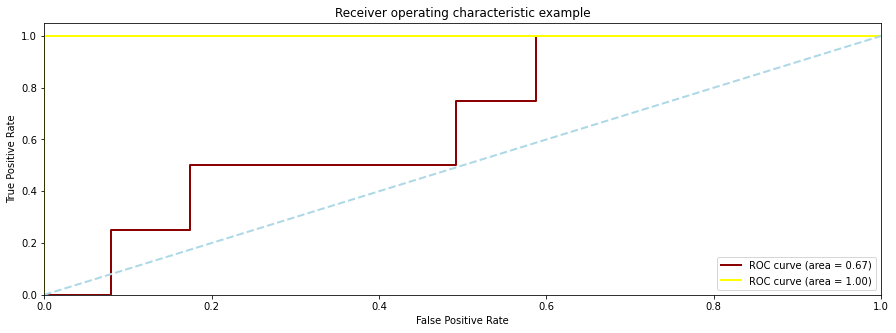

Random Forest Approach
In sample:
AUC :   1.0
GINI:  1.0
Out sample: 
AUC :   0.6666666666666666
GINI:  0.33333333333333326


In [234]:
predicitons_rf_prob = rf.predict_proba(test_features)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(test_labels, predicitons_rf_prob)
auc = metrics.auc(fpr, tpr)

#In Sample measurements
fpr_rf_is, tpr_rf_is, thresholds_rf_is = metrics.roc_curve(train_labels, predictions_prob_rf_insample)
auc_rf_is = metrics.auc(fpr_rf_is, tpr_rf_is)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr, tpr, color='darkred',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
axes = plt.plot(fpr_rf_is, tpr_rf_is, color='yellow',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_rf_is)        
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print("Random Forest Approach")
print("In sample:")
print('AUC :  ',auc_rf_is)
print('GINI: ', 2*auc_rf_is -1)
print("Out sample: ")
print('AUC :  ',auc)
print('GINI: ', 2*auc -1)

In [235]:
weights =np.array([18 if i == 1 else 0.9 for i in train_labels])
# Train the model on training data
rf.fit(train_features, train_labels, sample_weight = weights)

RandomForestClassifier(class_weight='balanced_subsample', min_samples_leaf=3,
                       min_samples_split=5, n_estimators=2000, n_jobs=2,
                       oob_score=True, random_state=0)

# Coming to the Test Sample

In [ ]:
df_test

In [ ]:
X = df_test[['age_num','cash', 'profit_margin', 'ebit_margin', 'wc_ratio', 'ocf_ratio', 'equity_ratio', 'debt_to_equity', 'roa']]
#X = sm.add_constant(X) #weiß nicht ob man das mochen soll/ bei den PDs ändert sich nichts

X.loc['C_712','ocf_ratio'] = 0
X.loc['C_712']

In [ ]:
prediction = pd.DataFrame(mdl1.predict(X))
x = round(prediction*100,2)

In [ ]:
x.describe()

In [ ]:
x.sort_values(by=0,ascending=False)

In [ ]:
df_test.loc["C_712"] #der geht nicht

## Random Forest Export

In [ ]:
X = sm.add_constant(X) #weiß nicht ob man das mochen soll/ bei den PDs ändert sich nichts
X_rf = X.copy()
i_ndex = X.index
#X_rf = X.reset_index()
#X_rf = X_rf.set_index('id')
#X_rf = X_rf.drop('id', axis=1)
X_rf.replace([np.inf, -np.inf], np.nan, inplace=True)
#X_rf = np.array(X_rf)

In [ ]:
X_rf.replace(np.nan, 0, inplace=True)
#np.where(np.isnan(X_rf))

In [ ]:
y_RF = pd.DataFrame(rf.predict(X_rf),columns={'Default'},index=i_ndex)
y_RF_prob = pd.DataFrame(rf.predict_proba(X_rf),index=i_ndex)
y_RF_prob = round(y_RF_prob*100,2)

y_RF_prob.sort_values(by=1, ascending=False)

In [ ]:
y_RF.sort_values(by='Default',ascending=False)

In [ ]:
train_RF = pd.concat([y_RF, y_RF_prob], axis=1)
train_RF

 # Export
 the Data as a CSV file for the Upload
  

In [ ]:
train_RF.to_csv("trained_RF-Approach.csv")

In [ ]:
 x.to_csv("trained_Logit-Approach.csv")